In [1]:
import mysql.connector
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import pandas as pd
from sklearn.preprocessing import minmax_scale

import seaborn as sns

from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from datetime import datetime

# Matplotlib visualization
import matplotlib.pyplot as plt

import warnings
import os
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)
pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)
os.chdir('C:/Users/Anders/Documents/Python/TravAnalys/')
store = pd.HDFStore('TravDB.h5')
store.close()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Detta behöver inte köras varje gång.

# os.chdir('C:/Users/Anders/Documents/Python/TravAnalys/')
# store = pd.HDFStore('TravDB.h5')

# mydb = mysql.connector.connect(
#     host="localhost",
#     user="root",
#     passwd="xxxxx12345",
#     database="TravDB")

# store['odds'] = pd.read_sql('SELECT * FROM odds', con=mydb)
# store['tvl'] = pd.read_sql('SELECT * FROM tvl', con=mydb)
# store['lopp'] = pd.read_sql('SELECT * FROM lopp', con=mydb)
# store['prog'] = pd.read_sql('SELECT * FROM prog', con=mydb)
# store['horse'] = pd.read_sql('SELECT * FROM horse', con=mydb)
# store['agare'] = pd.read_sql('SELECT * FROM agare', con=mydb)
# store['mtid'] = pd.read_sql('SELECT * FROM mtid', con=mydb)
# store['age'] = pd.read_sql('SELECT * FROM age', con=mydb)
# store['ban'] = pd.read_sql('SELECT * FROM ban', con=mydb)
# store['variab'] = pd.read_sql('SELECT * FROM variab', con=mydb)
# store.close()


In [3]:
# lopp.head()
# prog.head()
# tvl.head()

In [4]:
os.chdir('C:/Users/Anders/Documents/Python/TravAnalys/')
store = pd.HDFStore('TravDB.h5', format='table')

tvl = store['tvl']
prog = store['prog']
lopp = store['lopp']
horse = store['horse']

df = pd.concat([tvl.dropna(subset=['v5']),
                tvl.dropna(subset=['v75']),
                tvl.dropna(subset=['v86'])], ignore_index=True)

df['V5'] = df['v5'].apply(lambda x: 1 if x >= 0 else 0)
df['V75'] = df['v75'].apply(lambda x: 1 if x >= 0 else 0)
df['V86'] = df['v86'].apply(lambda x: 1 if x >= 0 else 0)

def spel(row):
    if row['V5'] == 1:
        return 'V5'
    if row['V75'] == 1:
        return 'V75'
    if row['V86'] == 1:
        return 'V86'
    return 'Other'

df['Spel'] = df.apply(spel, axis = 1)
df = df.drop(columns=['v5','v75','v86','bana'])

dftvl = df.rename(columns={'id': 'tvlid'})


In [5]:
prog.head()
# dftvl.head()
# ban = store['ban'] 
# ban.head(200)
# lopp = store['lopp']
# lopp.tail()

,id,tvlid,horseid,spar,kusk,pvalue,tid,verklspar,plac,rank,atgkod,odds1,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,stabilitet,stabb,bort,pvalue2,stid,diff,tidsrank,tidsplac,tidsrank2,v57,v58,v59,v60,ranktid,v61,v62,bana,avdv75,v63,v64,v65,v66,agarnr,tranarnr,v67,uppehall,v68,v69,v70,v71,v72,v73,antstreck,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,190657,17450,23900,1,3824,1.71,228,1.0,4,2.0,Tho He,NaN,0.0,0.0,0.0,0.0,8.0,13042.0,0.0,1.0,0.0,43000.0,43000.0,7167.0,9.0,277.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,34.0,0.0,NaN,80.0,1.0,50.0,19.0,0.0,1.0,100.0,0.0,0.0,4.0,12.0,6615.0,13.0,388.0,NaN,12.0,176.0,197.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,35.0,50.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,None,4.0,228.0,11.0,3.52,3.905660,0.0,0.0,0.0,17.0,NaN,3.0,0.0,0.0,J,0.0,-187.0,182.0,48.0,0.0,7052.0,839.0,0.0,3.0,3.0,809.0,966.0,881.0,91.0,99.0,NaN,202.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,21.0,18.0,22.0,17.0,NaN,11.0,2.0,NaN,NaN,NaN,None,None,None,None,None
1,190658,17450,9081,2,1346,1.00,217,2.0,1,1.0,Luo Ul,NaN,0.0,0.0,0.0,0.0,8.0,13041.0,0.0,0.0,2.0,35000.0,35000.0,17500.0,9.0,276.0,20.0,1.0,20.0,1.0,0.0,0.0,186.0,15.0,0.0,0.0,472.0,1.0,100.0,16.0,0.0,0.0,100.0,0.0,50.0,2.0,8.0,126.0,11.0,10.0,NaN,0.0,188.0,188.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,20.0,100.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,None,1.0,217.0,0.0,1.00,1.000000,0.0,0.0,0.0,34.0,NaN,1.0,0.0,0.0,J,0.0,-194.0,-177.0,22.0,0.0,2904.0,1265.0,0.0,3.0,2.0,809.0,966.0,881.0,91.0,99.0,NaN,192.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,45.0,35.0,56.0,10.0,NaN,29.0,1.0,NaN,NaN,NaN,None,None,None,None,None
2,190659,17450,23336,3,211,2.12,228,3.0,5,3.0,Bok In,NaN,0.0,0.0,0.0,0.0,8.0,83.0,1.0,1.0,0.0,20000.0,20000.0,6667.0,9.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,33.0,0.0,0.0,380.0,2.0,33.0,27.0,0.0,0.0,13.0,0.0,0.0,4.0,9.0,144.0,8.0,7.0,NaN,0.0,164.0,164.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,33.0,0.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,None,6.0,228.0,11.0,3.50,3.905660,0.0,0.0,0.0,11.0,NaN,2.0,0.0,0.0,J,0.0,204.0,-164.0,81.0,0.0,108.0,645.0,0.0,3.0,1.0,809.0,922.0,881.0,62.0,99.0,NaN,177.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.0,13.0,9.0,21.0,NaN,9.0,3.0,NaN,NaN,NaN,None,None,None,None,None
3,190660,17450,15541,4,1163,2.23,219,4.0,2,4.0,Ben In,NaN,0.0,0.0,0.0,0.0,9.0,35.0,1.0,0.0,0.0,25327.0,25327.0,4221.0,9.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,50.0,0.0,0.0,16.0,3.0,16.0,30.0,0.0,0.0,49.0,0.0,0.0,4.0,8.0,112.0,6.0,5.0,NaN,53.0,198.0,198.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,16.0,0.0,50.0,25.0,0.0,NaN,NaN,NaN,None,7.0,219.0,2.0,6.19,1.528302,0.0,0.0,0.0,13.0,NaN,4.0,0.0,0.0,J,0.0,219.0,-192.0,107.0,0.0,4792.0,1514.0,0.0,1.0,4.0,809.0,911.0,950.0,72.0,99.0,NaN,205.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,13.0,7.0,22.0,NaN,7.0,4.0,NaN,NaN,NaN,None,None,None,None,None
4,190661,17450,23556,5,484,2.71,265,5.0,O,7.0,Sju Jö,NaN,0.0,0.0,0.0,0.0,8.0,13041.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,90.0,0.0,0.0,123.0,3.0,0.0,44.0,0.0,0.0,100.0,0.0,0.0,7.0,8.0,75.0,8.0,6.0,NaN,5.0,253.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,90.0,0.0,0.0,NaN,NaN,NaN,None,9.0,265.0,48.0,13.85,13.679245,0.0,0.0,0.0,7.0,NaN,5.0,0.0,0.0,J,0.0,-500.0,-500.0,407.0,0.0,4792.0,7313.0,0.0,0.0,5.0,809.0,966.0,1053.0,75.0,99.0,NaN,500.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,1.0,27.0,NaN,5.0,7.0,NaN,NaN,NaN,None,None,None,None,None


In [6]:
# Variabelname finns i variab
v = store['variab'][1:]
v['id'] = 'v'+v['id'].astype(str)
dfprog = prog.rename(columns=dict(v[['id','namn']].values))
dfprog.head()

,id,tvlid,horseid,spar,kusk,pvalue,tid,verklspar,plac,rank,atgkod,odds1,AgareP,AgareSegrar,ArvP,ArvSegrar,BanP,BanSegrar,Galopp,InbForluster,InbSegrar,Intakt,IntaktII,IntaktperStart,KonAlder,KonAlderSegrar,KuskBanP,KuskBanSegrar,KuskP,KuskSegrar,KuskV75P,KuskV75Segrar,Maskintid,Medelplac,MorfarP,MorfarSegrar,Odds,OddsAnalys,PlatsP,Platsodds,RakaSegrar,Rekord,Resvag,Runda,SegerP,SenasteStart,SparP,SparSegrar,SparBanP,SparBanSegrar,Streck,StreckP,TidBesta,TidSenast,Tillagg,TranareP,TranareSegrar,Uppehall,V75Proc,V75Segrar,V75Starter,BanfhMedel,BanfhPlatsP,BanfhSegerP,DistansMedel,DistansPlatsP,DistansSegerP,Stabilitet,stabilitet,stabb,bort,pvalue2,stid,diff,tidsrank,tidsplac,tidsrank2,PrisFgStart,PrisMedel,Egen1,Egen2,ranktid,BanfhSegrar,DistansSegrar,bana,avdv75,DistansTid,AutoKort,Tswodds,Poäng,agarnr,tranarnr,AtgPoäng,uppehall,MtidRank,RakaVinstP,GaloppVinstP,UppehallVinstP,KuskRank,FramBakspar,antstreck,MtidMedel,MtidForm,Streckant,StreckantP,SpårklassP,SpårklassSegrar,SpårTidSenast,SpårTidBästa,SpårTidSegKvot,SpårTidSeger%,SpårTidRank,Vinstchans,SHRank,SHRankTid,Ranktal,RanktalTid,POdds,IntaktRank,SnittOdds,PoengSnitt,Hardhet,Hardhet2,PoengRank,PoengBetyg,v98,v99
0,190657,17450,23900,1,3824,1.71,228,1.0,4,2.0,Tho He,NaN,0.0,0.0,0.0,0.0,8.0,13042.0,0.0,1.0,0.0,43000.0,43000.0,7167.0,9.0,277.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,34.0,0.0,NaN,80.0,1.0,50.0,19.0,0.0,1.0,100.0,0.0,0.0,4.0,12.0,6615.0,13.0,388.0,NaN,12.0,176.0,197.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,35.0,50.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,None,4.0,228.0,11.0,3.52,3.905660,0.0,0.0,0.0,17.0,NaN,3.0,0.0,0.0,J,0.0,-187.0,182.0,48.0,0.0,7052.0,839.0,0.0,3.0,3.0,809.0,966.0,881.0,91.0,99.0,NaN,202.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,21.0,18.0,22.0,17.0,NaN,11.0,2.0,NaN,NaN,NaN,None,None,None,None,None
1,190658,17450,9081,2,1346,1.00,217,2.0,1,1.0,Luo Ul,NaN,0.0,0.0,0.0,0.0,8.0,13041.0,0.0,0.0,2.0,35000.0,35000.0,17500.0,9.0,276.0,20.0,1.0,20.0,1.0,0.0,0.0,186.0,15.0,0.0,0.0,472.0,1.0,100.0,16.0,0.0,0.0,100.0,0.0,50.0,2.0,8.0,126.0,11.0,10.0,NaN,0.0,188.0,188.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,20.0,100.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,None,1.0,217.0,0.0,1.00,1.000000,0.0,0.0,0.0,34.0,NaN,1.0,0.0,0.0,J,0.0,-194.0,-177.0,22.0,0.0,2904.0,1265.0,0.0,3.0,2.0,809.0,966.0,881.0,91.0,99.0,NaN,192.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,45.0,35.0,56.0,10.0,NaN,29.0,1.0,NaN,NaN,NaN,None,None,None,None,None
2,190659,17450,23336,3,211,2.12,228,3.0,5,3.0,Bok In,NaN,0.0,0.0,0.0,0.0,8.0,83.0,1.0,1.0,0.0,20000.0,20000.0,6667.0,9.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,33.0,0.0,0.0,380.0,2.0,33.0,27.0,0.0,0.0,13.0,0.0,0.0,4.0,9.0,144.0,8.0,7.0,NaN,0.0,164.0,164.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,33.0,0.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,None,6.0,228.0,11.0,3.50,3.905660,0.0,0.0,0.0,11.0,NaN,2.0,0.0,0.0,J,0.0,204.0,-164.0,81.0,0.0,108.0,645.0,0.0,3.0,1.0,809.0,922.0,881.0,62.0,99.0,NaN,177.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.0,13.0,9.0,21.0,NaN,9.0,3.0,NaN,NaN,NaN,None,None,None,None,None
3,190660,17450,15541,4,1163,2.23,219,4.0,2,4.0,Ben In,NaN,0.0,0.0,0.0,0.0,9.0,35.0,1.0,0.0,0.0,25327.0,25327.0,4221.0,9.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,50.0,0.0,0.0,16.0,3.0,16.0,30.0,0.0,0.0,49.0,0.0,0.0,4.0,8.0,112.0,6.0,5.0,NaN,53.0,198.0,198.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,16.0,0.0,50.0,25.0,0.0,NaN,NaN,NaN,None,7.0,219.0,2.0,6.19,1.528302,0.0,0.0,0.0,13.0,NaN,4.0,0.0,0.0,J,0.0,219.0,-192.0,107.0,0.0,4792.0,1514.0,0.0,1.0,4.0,809.0,911.0,950.0,72.0,99.0,NaN,205.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,13.0,7.0,22.0,NaN,7.0,4.0,NaN,NaN,NaN,None,None,None,None,None
4,190661,17450,23556,5,484,2.71,265,5.0,O,7.0,Sju Jö,NaN,0.0,0.0,0.0,0.0,8.0,13041.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,90.0,0.0,0.0,123.0,3.0,0.0,44.0,0.0,0.0,100.0,0.0,0.0,7.0,8.0,75.0,8.0,6.0,NaN,5.0,253.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,90.0,0.0,0.0,NaN,NaN,NaN,None,9.0,265.0,48.0,13.85,13.679245,0.0,0.0,0.0,7.0,NaN,5.0,0.0,0.0,J,0.0,-500.0,-500.0,407.0,0.0,4792.0,7313.0,0.0,0.0,5.0,809.0,966.

In [7]:
# df.count()

In [8]:
# Mergar tvl df med prog df
df = pd.merge(dftvl, dfprog, on='tvlid', how='inner')
# Lägger på odds från odds df (jmf med Odds i prog)
df = pd.merge(df, lopp[['horseid','datum','lopp','odds']], how='inner', left_on=['horseid','datum','lopp'], right_on = ['horseid','datum','lopp'])
# Lägger på hästnamn (för att lättare hitta på ATG) och kön.
df = pd.merge(df, horse[['id','namn','sex']], how='left', left_on=['horseid'], right_on = ['id'])

# Tar bort kolumner som varken är features eller id-variabler
df.drop(columns=['forstapris','loppid','starttid','konhv','antilopp','atgkod','odds1','Odds','id_x','id_y',
                 'tid','stid','diff', 'tidsplac','POdds','OddsAnalys','v98','v99','V5','V75','V86','v65'], inplace = True)

# Tar bort felaktiga värden i odds
df['odds'] = df.odds.str.replace(',',".")
df['odds'] = df.odds.str.replace('&',"")
df['odds'] = df.odds.str.replace('p',"")
df.odds.replace(['999','9999','P','-',''],['0','0','0','0','0'], inplace=True)
df.odds = df.odds.astype(float)

# Spar undan df med samtliga kolumner, används för att läsa tillbaka id-variabler. 
df_selected = df[['tvlid','datum','lopp','startsatt','division','spar','plac','odds','horseid','bana','Spel','namn']]

In [9]:
a = df[df.tvlid == 17450]
a[['datum','odds','lopp','bana','spar','plac','Spel','namn','Platsodds']]

,datum,odds,lopp,bana,spar,plac,Spel,namn,Platsodds
1113837,2002-01-01,41.0,1,J,1,4,V75,THE CHOICE,19.0
1113838,2002-01-01,20.0,1,J,2,1,V75,GIGO LLOYD,16.0
1113839,2002-01-01,96.0,1,J,3,5,V75,SURPRISE LANIA,27.0
1113840,2002-01-01,114.0,1,J,4,2,V75,MEN HERRN DÅ,30.0
1113841,2002-01-01,132.0,1,J,5,O,V75,TA MIN DÅ,44.0
1113842,2002-01-01,130.0,1,J,6,3,V75,G.R.AGATON,28.0
1113843,2002-01-01,62.0,1,J,7,O,V75,INKA FORCE,21.0
1113844,2002-01-01,325.0,1,J,8,d,V75,MEN IGÅR DÅ,58.0


In [10]:
# df.groupby('sex').count()
# d = df[['datum','Odds','odds','lopp','bana','spar','plac','Spel','namn']]
# d['datum'] = pd.to_datetime(d['datum'], errors = 'coerce')
# d[d.datum > '2018-11-01']

In [11]:
# pd.crosstab(df['startsatt'], columns='count')
# pd.crosstab(df['distans'], columns='count')
# pd.crosstab(df['division'], columns='count')
# pd.crosstab(df['banforh'], columns='count')
# pd.crosstab(df['Spel'], columns='count')

In [12]:
# Beräknar andel missing-värden per koloumn
def missing_values_table(df):
        mis_val = df.isnull().sum()       
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns
    
missvar = missing_values_table(df)
# missvar

Your selected dataframe has 125 columns.
There are 115 columns that have missing values.


In [13]:
# missvar

In [14]:
# Tar bort variabler med mer än 5% missing.
var= missvar[missvar['% of Total Values']>5]
var['var'] = var.index

df2 = df.drop(columns=list(var['var']))
# Skapar vinnarflagga 
df2['VinnareFlg'] = df2['plac'].apply(lambda x: 1 if x == '1' else 0)

# Skapar platsflagga 
df2['PlatsFlg'] = df2['plac'].apply(lambda x: 1 if x in ['1','2','3'] else 0)

# df2.head()
# df2.info()


In [15]:
a = df2[df2.tvlid == 188391]
a[['datum','odds','lopp','bana','spar','plac','Spel','namn','TidBesta']]


,datum,odds,lopp,bana,spar,plac,Spel,namn,TidBesta
1402028,2018-12-05,346.0,9,S,1,3,V86,TZATZIKI,137.0
1402029,2018-12-05,28.0,9,S,2,7,V86,SHORT IN CASH,120.0
1402030,2018-12-05,264.0,9,S,3,9,V86,PAX,135.0
1402031,2018-12-05,229.0,9,S,4,9,V86,HERCULES T.,123.0
1402032,2018-12-05,65.0,9,S,5,4,V86,ROOFPARTY,126.0
1402033,2018-12-05,55.0,9,S,6,2,V86,MARVELOUS,130.0
1402034,2018-12-05,141.0,9,S,7,9,V86,SLAGHÖKEN,142.0
1402035,2018-12-05,207.0,9,S,8,6,V86,SEBASTIAN JOURNEY,145.0
1402036,2018-12-05,880.0,9,S,9,8,V86,MAISON PLAGE,143.0
1402037,2018-12-05,283.0,9,S,10,1,V86,REVEREND WINE,130.0


In [16]:
# Ersätter missingvärden.

start_time = datetime.now()

df2['datum'] = pd.to_datetime(df2['datum'], errors = 'coerce')
df_all = df2.loc[(df2['datum'] > '2016-01-01')]

# df_all = df_all.tail(20000)
# df_all.TidBesta = df_all.TidBesta.replace(137, np.nan)

df_all['index'] = df_all.index
num_df = df_all.select_dtypes('number')
num_df.drop('odds', axis=1, inplace=True) # Missing i odds ska inte ersättas.
num_cols = num_df.columns
miss_cols = num_df.columns[num_df.isnull().any()].tolist()

# Lägger på min och max för alla kolumner inom ramen för tvlid. Används när normaliserade variabler beräkns. 
gmean = df_all[miss_cols+['tvlid']].groupby('tvlid').mean().add_prefix('mean_')
gmin = df_all.groupby('tvlid').min().add_prefix('min_')
gmax = df_all.groupby('tvlid').max().add_prefix('max_')

# Joinar på index(tvlid)
df_all.set_index('tvlid', inplace = True)
df_all= df_all.join(gmean, how='inner')
df_all = df_all.join(gmin, how='inner')
df_all = df_all.join(gmax, how='inner')

# Sätter tillbaka index.
df_all['tvlid'] = df_all.index
df_all = df_all.set_index('index')
df_all.index.name = None
df_all=df_all.sort_index()

df_all = df_all[~df_all.index.duplicated()]

# Om en häst i ett lopp har missing ersätt detta värde med medelvärdet över alla häster i loppet
for name in miss_cols:
# Här blev det fel! Ersätter med loc istället.
#     df_all[name] = np.where(df_all[name].isnull, df_all['mean_'+name], df_all[name])
    df_all.loc[df_all[name].isnull(),name] = df_all['mean_'+name]
    
# Om any missing tas raden bort (efter steget ovan finns bara fall där alla hästar har missing, dvs hela loppet tas bort)     
df_all.dropna(how='any', inplace = True)

# Tar bort mean_-columner
df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='mean_')))]

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))




Duration: 0:04:26.705674


In [17]:
# df_all.tail()

# a = df_all[df_all.tvlid == 188391]
# a
# a[['tvlid','datum','odds','lopp','bana','spar','plac','Spel','namn']]


In [18]:
# df_all.count()

In [19]:
# Normaliserar alla kolummer. Placering är relativt inom ramen för varje lopp vilket även features ska vara.
# Tar bort variabler som ej är features.

df_all2 = df_all.copy()

num_col_fetures = list(num_cols)

ind2remove = ['index','tvlid','lopp','spar','kusk','verklspar','VinnareFlg','PlatsFlg','agarnr','tranarnr','horseid']

for i in ind2remove:
    num_col_fetures.remove(i)
    
for name in num_col_fetures:
#     Om min och max är samma sätts 0.5 som normaliserat värde 
    df_all2['N_'+name] = np.where((df_all2['max_'+name] != df_all2['min_'+name]),
                                  (df_all2['max_'+name] - df_all2[name]) / (df_all2['max_'+name] - df_all2['min_'+name]), 0.5)
      
selection = ['odds','VinnareFlg','PlatsFlg','datum','tvlid','namn','bana','lopp','spar','Spel','sex','startsatt','division']+list(df_all2.columns[pd.Series(df_all2.columns).str.startswith('N_')])
df_select = df_all2[selection]


In [20]:
# Skapar dummies och sätter prefix till 'N_' (feature).
df_select.sex= df_select.sex.apply(lambda x: 'VAL' if x == 'V' else x)
g_sex = pd.get_dummies(df_select.sex, prefix='N', drop_first=True)
g_spel = pd.get_dummies(df_select.Spel, prefix='N', drop_first=True)
df_select.startsatt= df_select.startsatt.apply(lambda x: 'VOLT' if x == 'V' else x)
g_start = pd.get_dummies(df_select.startsatt, prefix='N', drop_first=True)
df_select.division = df_select.division.apply(lambda x: 'V' if x == 'V' else 'NOT_V')
g_div = pd.get_dummies(df_select.division, prefix='N', drop_first=True)
df_select = pd.concat([df_select, g_sex, g_spel, g_start, g_div], axis = 1)
# df_select.info(200)


In [21]:
# Tar bort odds under 1.
print(len(df_select))
df_select = df_select[df_select.odds > 1]
print(len(df_select))
# Tar bort lopp som saknar vinnare.
df_select = df_select.loc[df_select.groupby('tvlid')['VinnareFlg'].transform(sum) == 1]
print(len(df_select))

205531
204988
194032


In [22]:
df_select.head()

,odds,VinnareFlg,PlatsFlg,datum,tvlid,namn,bana,lopp,spar,Spel,sex,startsatt,division,N_pvalue,N_rank,N_AgareP,N_ArvP,N_ArvSegrar,N_BanP,N_BanSegrar,N_Galopp,N_InbForluster,N_InbSegrar,N_Intakt,N_IntaktII,N_IntaktperStart,N_KonAlder,N_KonAlderSegrar,N_KuskBanP,N_KuskBanSegrar,N_KuskP,N_KuskSegrar,N_KuskV75P,N_KuskV75Segrar,N_Maskintid,N_Medelplac,N_PlatsP,N_Platsodds,N_RakaSegrar,N_Rekord,N_Resvag,N_Runda,N_SegerP,N_SenasteStart,N_SparP,N_SparSegrar,N_SparBanP,N_SparBanSegrar,N_TidBesta,N_TidSenast,N_Tillagg,N_TranareP,N_TranareSegrar,N_Uppehall,N_V75Proc,N_V75Segrar,N_V75Starter,N_BanfhMedel,N_BanfhPlatsP,N_BanfhSegerP,N_DistansMedel,N_DistansPlatsP,N_DistansSegerP,N_pvalue2,N_tidsrank,N_PrisFgStart,N_PrisMedel,N_BanfhSegrar,N_DistansSegrar,N_DistansTid,N_Tswodds,N_AtgPoäng,N_MtidRank,N_RakaVinstP,N_GaloppVinstP,N_UppehallVinstP,N_KuskRank,N_SpårklassP,N_SpårklassSegrar,N_Vinstchans,N_SHRank,N_Ranktal,N_IntaktRank,N_S,N_VAL,N_V75,N_V86,N_VOLT,N_V
762845,39.0,0,0,2018-11-04,187285,SIKVELANDS BORK*,MO,4,1,V5,VAL,VOLT,V,0.628466,0.875,0.5,1.000000,1.000000,0.000000,0.412017,1.0,0.0,1.000000,0.937474,0.689374,0.000000,0.166667,0.652611,1.0,1.0,0.0,0.0,0.5,0.5,0.020690,0.714286,0.342466,0.954128,0.5,0.0,0.0,1.0,0.000000,0.375,0.0,0.000000,0.727273,0.0,0.245614,0.035088,1.0,0.652174,0.666667,0.25,0.5,0.5,0.5,0.611111,0.342466,0.000000,0.545455,0.367647,0.000000,0.692308,0.798680,0.809571,0.233138,0.000000,0.000000,0.000000,0.944206,0.5,0.142857,0.450331,0.0,0.889222,1.0,0.000000,0.000000,0.526316,0.731707,0.629630,1.00,0,1,0,0,1,1
762846,112.0,0,1,2018-11-04,187285,ODIN FAKS*,MO,4,3,V5,VAL,VOLT,V,0.310536,0.750,0.5,0.000000,0.000000,1.000000,0.965665,1.0,1.0,1.000000,0.934891,1.000000,0.882332,0.833333,0.833322,1.0,1.0,1.0,1.0,0.5,0.5,1.000000,0.392857,0.602740,0.706422,0.0,1.0,0.0,1.0,0.454545,1.000,0.6,0.362816,0.954545,0.5,1.000000,1.000000,1.0,0.000000,0.000000,1.00,0.5,0.5,0.5,0.370370,0.602740,0.454545,0.345455,0.573529,0.513514,0.307692,0.600660,0.000000,0.571396,0.333333,0.333333,0.382353,0.896996,0.5,1.000000,0.000000,0.0,0.000000,0.0,0.666667,0.335746,0.684211,0.829268,0.314815,0.25,0,1,0,0,1,1
762847,86.0,0,0,2018-11-04,187285,WIK FAKSEN*,MO,4,4,V5,VAL,VOLT,V,0.227357,0.375,0.5,0.461538,0.992472,0.000000,0.000000,1.0,1.0,1.000000,1.000000,0.794335,0.784491,0.000000,0.000000,1.0,1.0,1.0,1.0,0.5,0.5,0.000000,0.785714,0.753425,0.880734,1.0,1.0,1.0,1.0,1.000000,0.625,1.0,0.545277,0.909091,0.5,0.000000,0.000000,1.0,1.000000,1.000000,0.75,0.5,0.5,0.5,0.407407,0.753425,1.000000,0.254545,0.926471,1.000000,0.230769,0.320132,0.714286,0.581999,1.000000,1.000000,0.058824,0.525751,0.5,0.000000,1.000000,0.0,0.649701,0.0,1.000000,0.523465,0.947368,0.951220,0.222222,0.50,0,1,0,0,1,1
762848,506.0,0,0,2018-11-04,187285,DRILL ROSA*,MO,4,6,V5,S,VOLT,V,0.000000,0.000,0.5,0.538462,0.996830,0.000000,0.000000,0.0,0.0,0.666667,0.291585,0.386923,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,0.5,0.5,0.931034,0.000000,1.000000,0.000000,1.0,1.0,1.0,0.0,0.787879,0.625,0.6,0.923887,1.000000,1.0,0.982456,0.982456,0.0,1.000000,1.000000,1.00,0.5,0.5,0.5,0.000000,1.000000,0.787879,0.000000,1.000000,0.810811,0.000000,0.000000,0.678571,1.000000,0.666667,0.666667,1.000000,0.000000,0.5,0.857143,1.000000,1.0,0.000000,0.0,0.333333,0.963804,1.000000,1.000000,0.000000,0.00,1,0,0,0,1,1
762849,19.0,1,1,2018-11-04,187285,FRIER BIRK*,MO,4,7,V5,VAL,VOLT,V,1.000000,1.000,0.5,0.230769,0.945325,0.333333,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.482520,0.333333,0.318639,0.0,0.0,0.0,0.0,0.5,0.5,0.186207,1.000000,0.000000,1.000000,1.0,1.0,0.0,0.0,0.393939,0.875,0.8,0.964801,0.772727,1.0,0.263158,0.263158,0.0,1.000000,1.000000,0.00,0.5,0.5,0.5,1.000000,0.000000,0.393939,1.000000,0.000000,0.324324,1.000000,1.000000,0.428571,0.000000,0.666667,0.666667,0.705882,1.000000,0.5,0.714286,1.000000,0.0,1.000000,1.0,0.166667,0.976535,0.000000,0.000000,1.000000,0.75,0,1,0,0,1,1


In [23]:
# Skapar train, validation och test df (test är out-of-time övriga är out-of-sample).
# Urvalet görs på tvlid-nivå och inte på radnivå.

test_period =(df_select['datum'] >= '2018-01-01') & (df_all['datum'] <= '2018-12-01')
df_test = df_select.loc[test_period]

train_valid_period =(df_select['datum'] >= '2016-01-01') & (df_all['datum'] < '2017-12-31')
df_train_valid = df_select.loc[train_valid_period]

train_tvlid = list(df_train_valid['tvlid'].drop_duplicates(inplace=False).sample(frac=0.8))

df_train = df_train_valid[df_train_valid['tvlid'].isin(train_tvlid)]
df_valid = df_train_valid[~df_train_valid['tvlid'].isin(train_tvlid)]

# print('Train:', df_train.shape, 'Valid:', df_valid.shape, 'Test:', df_test.shape)

df_train[df_train.replace([np.inf, -np.inf], np.nan).notnull().any(axis=1)]
df_valid[df_valid.replace([np.inf, -np.inf], np.nan).notnull().any(axis=1)]
df_test[df_test.replace([np.inf, -np.inf], np.nan).notnull().any(axis=1)]

# Skapar features
X = df_train[df_train.columns[pd.Series(df_train.columns).str.startswith('N_')]].astype(np.float64)
X_valid = df_valid[df_valid.columns[pd.Series(df_valid.columns).str.startswith('N_')]].astype(np.float64)
X_test = df_test[df_test.columns[pd.Series(df_test.columns).str.startswith('N_')]].astype(np.float64)

# Om det finns missing ersätts dessa med mean från train df.
X.fillna(X.mean(),inplace = True)
X_valid.fillna(X.mean(),inplace = True)
X_test.fillna(X.mean(),inplace = True)

# Skapar target
y = df_train['VinnareFlg'].astype(np.int32)
y_valid = df_valid['VinnareFlg'].astype(np.int32)
y_test = df_test['VinnareFlg'].astype(np.int32)

print('Train:', df_train.shape, 'Valid:', df_valid.shape, 'Test:', df_test.shape)
print('Train:', X.shape, 'Valid:', X_valid.shape, 'Test:', X_test.shape)
print('Train:', y.shape, 'Valid:', y_valid.shape, 'Test:', y_test.shape)


Train: (108192, 89) Valid: (26921, 89) Test: (56990, 89)
Train: (108192, 76) Valid: (26921, 76) Test: (56990, 76)
Train: (108192,) Valid: (26921,) Test: (56990,)


In [24]:
X.head()

,N_pvalue,N_rank,N_AgareP,N_ArvP,N_ArvSegrar,N_BanP,N_BanSegrar,N_Galopp,N_InbForluster,N_InbSegrar,N_Intakt,N_IntaktII,N_IntaktperStart,N_KonAlder,N_KonAlderSegrar,N_KuskBanP,N_KuskBanSegrar,N_KuskP,N_KuskSegrar,N_KuskV75P,N_KuskV75Segrar,N_Maskintid,N_Medelplac,N_PlatsP,N_Platsodds,N_RakaSegrar,N_Rekord,N_Resvag,N_Runda,N_SegerP,N_SenasteStart,N_SparP,N_SparSegrar,N_SparBanP,N_SparBanSegrar,N_TidBesta,N_TidSenast,N_Tillagg,N_TranareP,N_TranareSegrar,N_Uppehall,N_V75Proc,N_V75Segrar,N_V75Starter,N_BanfhMedel,N_BanfhPlatsP,N_BanfhSegerP,N_DistansMedel,N_DistansPlatsP,N_DistansSegerP,N_pvalue2,N_tidsrank,N_PrisFgStart,N_PrisMedel,N_BanfhSegrar,N_DistansSegrar,N_DistansTid,N_Tswodds,N_AtgPoäng,N_MtidRank,N_RakaVinstP,N_GaloppVinstP,N_UppehallVinstP,N_KuskRank,N_SpårklassP,N_SpårklassSegrar,N_Vinstchans,N_SHRank,N_Ranktal,N_IntaktRank,N_S,N_VAL,N_V75,N_V86,N_VOLT,N_V
936872,0.000000,0.000000,0.777778,0.818182,0.842033,0.5,0.51936,0.50,1.0,1.00,0.787363,1.000000,1.000000,0.9,1.000000,1.000000,1.000000,0.428571,0.976190,1.0,1.0,0.000000,0.015625,1.00,0.385366,1.0,0.0,0.78,1.0,1.0,0.000,0.000000,0.000000,0.000000,0.000000,0.135135,0.000000,1.0,0.35,0.896359,0.000000,0.5,0.5,0.5,0.015625,1.00,1.0,0.140625,1.00,1.0,0.000000,0.000000,1.0000,0.891096,1.0,1.0,0.000000,0.000000,1.000000,0.000000,1.0,0.928287,0.842391,0.200000,0.000000,0.000000,1.00000,1.000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0
936873,0.260212,0.583333,0.777778,0.945455,0.998626,0.5,0.51936,0.25,0.6,1.00,1.000000,0.476771,0.825897,0.8,0.864077,0.107143,0.727273,0.142857,0.880952,1.0,1.0,0.595745,0.000000,1.00,0.717073,1.0,0.0,0.78,1.0,1.0,0.500,0.428571,0.317033,0.333333,0.319277,0.567568,0.819444,1.0,0.40,0.977591,0.898148,0.5,0.5,0.5,0.000000,1.00,1.0,0.000000,1.00,1.0,0.230769,0.163717,0.8000,1.000000,1.0,1.0,0.564103,0.969782,0.994695,0.416667,1.0,0.964143,1.000000,0.600000,0.571429,0.369518,0.78125,0.850,0.257576,0.071429,1.0,0.0,0.0,0.0,1.0,1.0
936874,0.388805,0.833333,0.518519,0.781818,0.979396,0.5,0.00000,0.50,0.8,1.00,0.773998,0.335110,0.642530,0.0,0.844444,1.000000,1.000000,0.857143,0.976190,1.0,1.0,0.744681,0.562500,0.60,0.800000,1.0,1.0,0.58,1.0,1.0,0.625,0.428571,0.362275,0.333333,0.271084,0.756757,1.000000,1.0,0.85,0.953782,1.000000,0.5,0.5,0.5,0.562500,0.60,1.0,0.484375,0.67,1.0,0.384615,0.471239,0.7500,0.505380,1.0,1.0,0.615385,0.988808,0.679045,0.666667,1.0,0.928287,0.000000,0.200000,0.571429,0.364104,0.56250,0.825,0.393939,0.714286,0.0,1.0,0.0,0.0,1.0,1.0
936875,0.287443,0.666667,1.000000,0.781818,0.920330,0.5,0.51936,1.00,1.0,0.00,0.674362,0.272658,0.576296,0.7,0.751159,0.500000,0.818182,0.642857,0.952381,1.0,1.0,0.276596,0.500000,0.75,0.814634,1.0,1.0,0.78,1.0,1.0,0.625,0.714286,0.551065,0.500000,0.463855,0.000000,0.611111,1.0,0.70,0.886555,0.990741,0.5,0.5,0.5,0.500000,0.75,1.0,0.531250,1.00,1.0,0.307692,0.524336,0.5000,0.590162,1.0,1.0,0.333333,0.963906,0.726127,0.166667,1.0,0.000000,0.304348,0.433333,0.857143,0.567677,0.81250,0.875,0.287879,0.785714,1.0,0.0,0.0,0.0,1.0,1.0
936876,0.119516,0.333333,1.000000,1.000000,1.000000,1.0,0.69418,0.25,0.2,0.25,0.894289,0.410510,0.683101,0.6,0.616802,1.000000,1.000000,0.928571,1.000000,1.0,1.0,0.765957,0.250000,0.78,0.321951,1.0,0.0,1.00,1.0,1.0,0.750,0.285714,0.448270,0.166667,0.469880,0.783784,0.138889,1.0,1.00,1.000000,1.000000,0.5,0.5,0.5,0.296875,0.78,1.0,0.250000,0.72,1.0,0.076923,0.163717,0.5556,0.703441,1.0,1.0,0.179487,0.853386,0.860743,0.833333,1.0,0.964143,0.000000,0.000000,0.285714,0.356524,0.93750,0.950,0.121212,0.642857,1.0,0.0,0.0,0.0,1.0,1.0


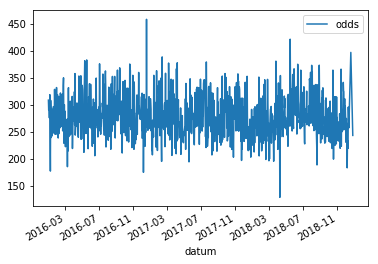

In [25]:
# c = list(df_test.columns[pd.Series(df_test.columns).str.startswith('N_')])
# c
# for n in c:
#     d = df_test.groupby(by = 'datum').mean()
#     d['datum'] = d.index
#     ax = plt.gca()
#     d.plot(kind='line',x='datum',y=n,ax=ax)
#     plt.show();

d = df_select.groupby(by = 'datum').mean()
d['datum'] = d.index
ax = plt.gca()
d.plot(kind='line',x='datum',y='odds',ax=ax)
plt.show();

In [26]:
print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

Path at terminal when executing this file
C:\Users\Anders\Documents\Python\TravAnalys



In [27]:
# df_train.tail()

In [28]:
import woe_iv
from woe_iv import data_vars, char_bin, mono_bin
catvars = ['N_S','N_VAL','N_V75','N_V86','N_VOLT','N_V']
iv_dat = X.drop(catvars, axis = 1)
final_iv, IV = data_vars(iv_dat,y)

In [29]:
IV

,VAR_NAME,IV
66,N_pvalue,1.311401
41,N_Ranktal,1.309602
68,N_rank,1.281546
67,N_pvalue2,1.277774
45,N_SHRank,1.225534
59,N_Tswodds,1.179547
65,N_Vinstchans,1.138351
36,N_Platsodds,1.125609
69,N_tidsrank,0.937497
21,N_IntaktRank,0.595880


In [30]:
# IV.head(200)
# Tar bort variabler som saknar förklaringsvärde. Behåller all kategorivariabler.

keepvar = list(IV[IV.IV > 0.1]['VAR_NAME'])+catvars

X = X[keepvar]
X_test = X_test[keepvar]
X_valid = X_valid[keepvar]


In [31]:
import os
os.chdir('C:/Users/Anders/Documents/Python/TravAnalys')
%run models.py

In [32]:
print('Train:', X.shape)

Train: (108192, 43)


In [33]:
d = df_test[['odds','VinnareFlg','PlatsFlg','datum','tvlid','namn','bana','lopp','spar','Spel']]
d['datum'] = pd.to_datetime(d['datum'], errors = 'coerce')
# d[d.tvlid == 188391]

In [34]:
import pulp
from pulp import *
prob = LpProblem('Giapetto', LpMinimize)


# Modellering
## RandomForest

RFmodel: Precicion:=0.4246 , Detects:=0.2636 , F1=0.3253: , AUC=0.8010:


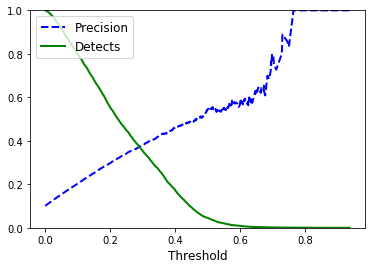

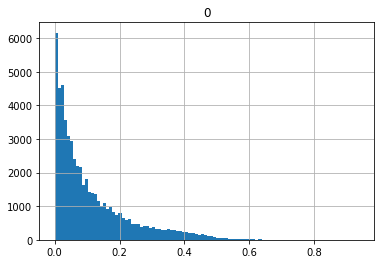

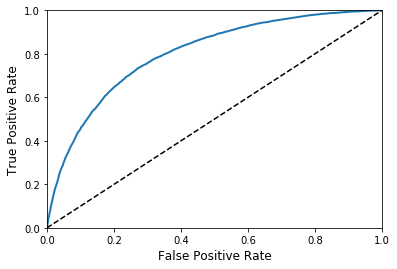

Duration: 0:06:56.440650


In [35]:
# Modell för sannolikhet för vinst.
start_time = datetime.now()

RFmodel = RandomForestClassifier(random_state=101, max_features='auto', n_estimators=1000)
y_prob, y_test_prob, y_valid_prob = fit_and_evaluate(RFmodel, 'RFmodel:', X, y, X_test, y_test, X_valid, y_valid, 0.35)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

## GradientBoosting

In [36]:
# # Modell för sannolikhet för vinst.
# start_time = datetime.now()

# GBmodel =  GradientBoostingClassifier(random_state=101)
# y_prob, y_test_prob, y_valid_prob = fit_and_evaluate(GBmodel, 'GBmodel:', X, y, X_test, y_test, X_valid, y_valid, 0.35)

# end_time = datetime.now()
# print('Duration: {}'.format(end_time - start_time))

In [37]:
# df_train.info()
# np.isinf(df_train).sum()
# np.isinf(df_train).sum()
# print(np.isnan(X).sum())
# print(np.isnan(X).sum())

In [38]:
# len(df_train)
# df_phat.info()

In [39]:
# Lägger på phat till alla df och beräknar CalcOdds och OddsRatio 

def addphat(ydata, probdata):
        
    y_df = pd.DataFrame(ydata)
    y_df.reset_index(inplace=True)
    y_df = pd.concat([y_df, pd.Series(probdata, name='phat')], axis=1)
    #  Sätter lägsta phat till 0.01
    y_df['phat'] = y_df.phat.apply(lambda x: 0.01 if x < 0.0001 else x)
    y_df.set_index('index', inplace=True)
    y_df.index.name = None
    
    df_phat = pd.merge(df_selected, y_df, left_index=True, right_index=True)
    df_phat['CalcOdds'] = 1/(df_phat['phat'])
    df_phat['odds'] = df_phat['odds']*0.1   
    df_phat['OddsRatio'] = df_phat['odds'] / df_phat['CalcOdds']
    
    return y_df, df_phat

y_train_df, df_train_phat = addphat(y, y_prob)
y_test_df, df_test_phat = addphat(y_test, y_test_prob)
y_valid_df, df_valid_phat = addphat(y_valid, y_valid_prob)

In [40]:
# df_train_phat.head(2)
# df_vaild_phat

In [41]:
# sns.distplot(df_test_phat.odds);
# plt.show()
# sns.distplot(df_test_phat.CalcOdds);
# plt.show()

# Resultat

g_OddsRatio,"(0.012199999999999999, 0.438]","(0.438, 0.631]","(0.631, 0.794]","(0.794, 0.983]","(0.983, 1.23]","(1.23, 1.688]","(1.688, 39.088]"
g_CalcOdds,,,,,,,
"(1.2400000000000002, 4.505]",-36.470588,-22.338530,-16.010710,-14.951220,-11.424968,-1.423729,113.310658
"(4.505, 7.634]",-53.424658,-32.400000,-20.792254,-14.463453,-19.602837,-24.758065,43.639010
"(7.634, 12.5]",-34.867257,-41.602564,-26.485437,-22.231405,-12.351047,-3.469388,5.251142
"(12.5, 20.833]",-46.809524,-5.111562,-7.486034,-6.523438,-10.761246,-47.829233,-21.162255
"(20.833, 37.037]",-49.339080,-44.661290,-30.422265,-48.584559,-37.733813,-25.435816,-51.683168
"(37.037, 83.333]",-38.407738,-34.924433,-46.341085,-37.677165,-31.428571,-41.180723,34.529148
"(83.333, 1000.0]",-48.793823,-29.344538,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


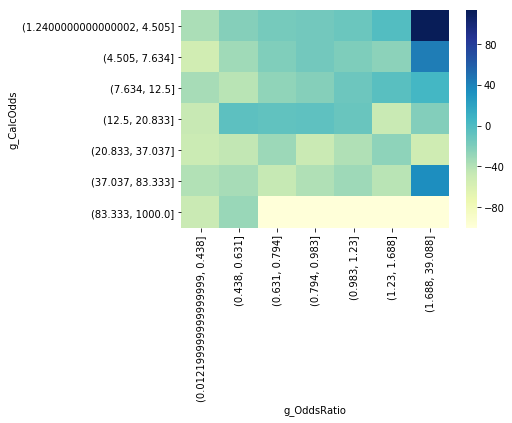

In [42]:
df = df_valid_phat[['CalcOdds','odds','OddsRatio','VinnareFlg','Spel','lopp','startsatt','division','datum',
                    'spar','bana','tvlid','namn']]

df = df[df.odds>1]
df.odds = df.odds.apply(lambda x: 100 if x > 100 else x) 

def res(row):
    if row['VinnareFlg'] == 1:
        return (row['odds'] * 100) - 100
    else:
        return -100
    
def resflg(row):
    if row['Result'] > 100:
        return 1
    else:
        return 0
    
df['Result'] = df.apply(res, axis = 1)
df['ResultFlg'] = df.apply(resflg, axis = 1)

df.reset_index()

# # df = df[~np.isnan(df)]
# # df = df[~np.isinf(df)]

# df = df[df.OddsRatio > 3]  
# df = df[df.CalcOdds <3]
# df = df[df.odds > 1]

# bins1 = np.linspace(df.CalcOdds.min(), df.CalcOdds.max(), 30)
# bins2 = np.linspace(df.OddsRatio.min(), df.OddsRatio.max(), 30)
# df['g_CalcOdds'] = pd.cut(df['CalcOdds'].values, bins1)
# df['g_OddsRatio'] = pd.cut(df['OddsRatio'].values, bins2)

df['g_CalcOdds'] = pd.qcut(df['CalcOdds'], 7)
df['g_OddsRatio'] = pd.qcut(df['OddsRatio'], 7)
# df['g_Odds'] = pd.qcut(df['odds'], 7)

# tab = df.groupby(['g_CalcOdds', 'g_OddsRatio']).Result.sum().unstack(fill_value=0)
tab = df.groupby(['g_CalcOdds', 'g_OddsRatio']).Result.mean().unstack(fill_value=0)

ax = sns.heatmap(tab, cmap="YlGnBu")

tab

# df = df.sort_values(by = 'odds', ascending=False)


In [43]:
# sns.distplot(df_train_phat.odds);
# plt.show()
# sns.distplot(df_valid_phat.odds);
# plt.show()
# sns.distplot(df_test_phat.odds);
# plt.show()
# sns.distplot(df.Result);
# plt.show()


In [44]:
# Plockar ut alla kombinationer av CalcOdds och OddsRatio som givit positivt resultat på validerings df.

def OddsFrame(df):
    
    out = pd.DataFrame()
    row = pd.DataFrame()
    total_row = 0
    
    for cols in list(tab.columns):
        row = pd.DataFrame(list(tab.loc[tab[cols] > 100].index.astype(str)))
        total_row = len(row)
        if total_row > 0:
            row.rename(columns = {list(row)[0]:'var'}, inplace=True)
            row['var'] = row['var'].map(lambda x: x.lstrip('(').rstrip(']'))
            row[['COlow','COhigh']] = row['var'].str.split(',',expand=True).astype(float)  
            row['ORlow'] = cols.left
            row['ORhigh'] = cols.right
            row.drop(columns=['var'], inplace=True)
            out = out.append(row,ignore_index=True, sort=False)
    return out
    
frame = OddsFrame(tab)
frame

# data = [{'COlow': 0, 'COhigh': 6.0, 'ORlow': 2.0, 'ORhigh': 99}]
# frame = pd.DataFrame(data)
# frame


,COlow,COhigh,ORlow,ORhigh
0,1.24,4.505,1.688,39.088


In [45]:
# Väljer ut vilka hästar som ska spelas (out-of-time) utifrån OddsFrame.

def SelectPosition(df):
    
    # För att resultatet inte ska påverkas för mycket av extrema odds sätts maxodds till 50.
    df['odds'] = df.odds.apply(lambda x: 100 if x > 100 else x)
    df3 = df[['CalcOdds','odds','OddsRatio','VinnareFlg','datum','tvlid','Spel','lopp','startsatt','division','spar']]
    df3['Result'] = df3.apply(res, axis = 1)
    df3.reset_index()
    
    out = pd.DataFrame()
    for i in range(0,len(frame)):
        d = frame[['COlow','COhigh','ORlow','ORhigh']][i:i+1]
        sel = (((df3.OddsRatio >= d['ORlow'].item()) & (df3.OddsRatio <= d['ORhigh'].item()))
#         sel = (((df3.odds >= d['ORlow'].item()) & (df3.odds <= d['ORhigh'].item()))
               & ((df3.CalcOdds >= d['COlow'].item()) & (df3.CalcOdds <= d['COhigh'].item())))
        out = out.append(df3[sel],ignore_index=True, sort=False)
    return out

df4_valid = SelectPosition(df_valid_phat)
df4_test = SelectPosition(df_test_phat)

# Man borde kanske inte spela vinnare på fler hästar än en i varje lopp. Resultatet visar dock att den extra kostnaden uppvägs
# av vinsterna.
# df4 = df4.loc[df4.groupby(['tvlid'])['CalcOdds'].idxmax()]  

# df4.Result.sum()


In [46]:
df4_valid.tail()

,CalcOdds,odds,OddsRatio,VinnareFlg,datum,tvlid,Spel,lopp,startsatt,division,spar,Result
435,2.331002,5.3,2.2737,1,2017-12-13,176171,V86,4,A,V,3,430.0
436,1.845018,12.4,6.7208,1,2017-12-20,176431,V86,7,V,V,8,1140.0
437,1.960784,5.5,2.8050,1,2017-12-06,175886,V86,7,V,V,12,450.0
438,3.984064,10.9,2.7359,0,2017-12-06,175886,V86,7,V,V,13,-100.0
439,1.562500,3.2,2.0480,1,2017-12-06,175914,V86,6,V,V,8,220.0


In [47]:
# print(np.isinf(X_valid_sel).sum())
# print(np.isinf(X_test_sel).sum())
# print(np.isnan(X_valid_sel).sum())
# print(np.isnan(X_test_sel).sum())

In [48]:
# df4.sort_values(by = ['Result'], ascending=False)
# df4

Ackumulerat resultat, out-of-time (2018)


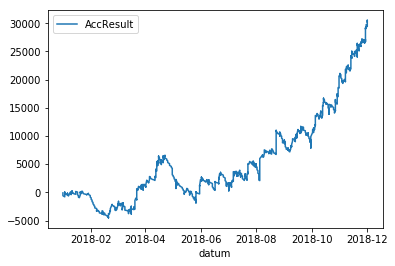

In [49]:
# Lägger på phat till test df

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df4 = df4_test.sort_values(by=['datum','tvlid'])#.drop_duplicates(inplace=False)
df4['AccResult'] = df4['Result'].cumsum(axis = 0)
print('Ackumulerat resultat, out-of-time (2018)')
ax = plt.gca()
df4.plot(kind='line',x='datum',y='AccResult',ax=ax)
plt.show();

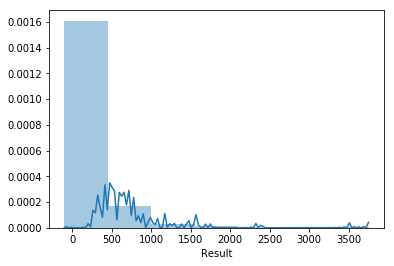

In [50]:
warnings.filterwarnings('ignore')
sns.distplot(df4['Result'], bins=7);
plt.show();

In [51]:
aggregation = {'Result': {'Sum(kr)': 'sum', 'Mean(kr)': 'mean', 'Antal(n)': 'count'}, 'VinnareFlg': {'VinstRatio': 'mean'} }

print(df4.groupby(['Spel']).agg(aggregation))
print()
print(df4.groupby(['division']).agg(aggregation))
print()
print(df4.groupby(['startsatt']).agg(aggregation))
print()
print(df4.groupby(['lopp']).agg(aggregation))
print()
print(df4.groupby(['spar']).agg(aggregation))
print()

       Result                     VinnareFlg
      Sum(kr)   Mean(kr) Antal(n) VinstRatio
Spel                                        
V5    31720.0  33.319328      952   0.161765
V75      20.0   0.095694      209   0.124402
V86   -1500.0  -9.375000      160   0.125000

           Result                      VinnareFlg
          Sum(kr)    Mean(kr) Antal(n) VinstRatio
division                                         
1          -350.0  -12.962963       27   0.111111
2          1320.0   52.800000       25   0.280000
B           150.0   11.538462       13   0.153846
F          -300.0 -100.000000        3   0.000000
G          -900.0 -100.000000        9   0.000000
K           870.0  290.000000        3   0.333333
L          -600.0 -100.000000        6   0.000000
Q           770.0   85.555556        9   0.222222
R          -100.0 -100.000000        1   0.000000
S          -800.0 -100.000000        8   0.000000
U          2990.0  175.882353       17   0.117647
V         26970.0   22.663866